In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, train_test_split
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('cardio_cleaned.csv')
df.rename(columns = {'cholesterol_1':'chol_1', 'cholesterol_2':'chol_2', 'cholesterol_3':'chol_3'}, inplace = True)
df = df.dropna()
print(df.shape)
df.head()

(68030, 16)


,age,height,weight,ap_hi,ap_lo,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3,gender,smoke,alco,active,cardio
0,0.588076,0.579487,0.269841,0.666667,0.576923,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.730159,0.517949,0.391534,0.743590,0.615385,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.564103,0.280423,0.717949,0.538462,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.528455,0.584615,0.375661,0.769231,0.653846,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.516918,0.517949,0.238095,0.641026,0.500000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [4]:
def lrcv(key, target_vars, df, resample=True):
    X = df.drop(target_vars[key], axis=1)
    y = df[key]
    print('\n{0}\n'.format(key))

    cols = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 80% training and 20% test

    if resample:
        smote = SMOTE()
        print("Before oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("Before oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
        X_train, y_train = smote.fit_sample(X_train, y_train.ravel())
        print("After oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("After oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
#         plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
        
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
#     predicted = cross_val_predict(LogisticRegression(), X, y, cv=cv)
    print('accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print(metrics.classification_report(y_test, y_pred))
    
    feature_coefs = pd.Series(clf.coef_.reshape(-1),index=cols).sort_values(ascending=False)
    print(feature_coefs)
    
    print('Confusion matrix:\n')
    cm = metrics.confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)

    return clf
    


cardio

accuracy: 0.5999559018080258
              precision    recall  f1-score   support

         0.0       0.57      0.81      0.67      6884
         1.0       0.67      0.38      0.48      6722

   micro avg       0.60      0.60      0.60     13606
   macro avg       0.62      0.60      0.58     13606
weighted avg       0.62      0.60      0.58     13606

chol_3    0.950996
gluc_2    0.352414
gluc_1    0.169182
height    0.124761
ap_hi     0.123848
gender    0.122460
age       0.074648
weight    0.073724
chol_2    0.025754
alco     -0.089396
gluc_3   -0.138901
smoke    -0.199376
active   -0.203734
ap_lo    -0.523252
chol_1   -0.594055
dtype: float64
Confusion matrix:



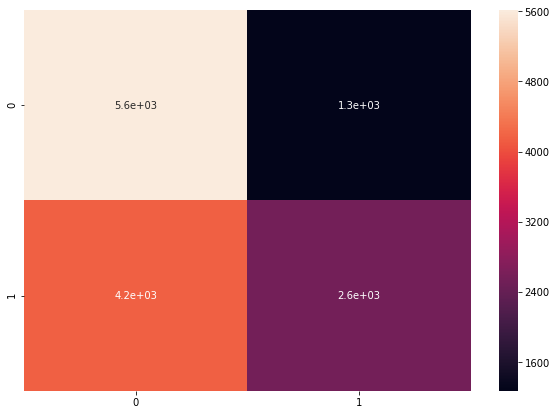

In [5]:
target_vars = {'cardio': ['cardio'], 'gluc_3':['gluc_1', 'gluc_2', 'gluc_3', 'cardio'], 'chol_3':['chol_1', 'chol_2', 'chol_3', 'cardio']}

clf = lrcv('cardio', target_vars, df, resample=False)


gluc_3

Before oversampling, counts of label '1': 4091
Before oversampling, counts of label '0': 50333 

After oversampling, counts of label '1': 50333
After oversampling, counts of label '0': 50333 

accuracy: 0.9079817727473174
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     12523
         1.0       0.45      0.65      0.53      1083

   micro avg       0.91      0.91      0.91     13606
   macro avg       0.71      0.79      0.74     13606
weighted avg       0.93      0.91      0.92     13606

chol_3    2.055824
height    0.919945
ap_lo     0.339055
active    0.038000
alco      0.023778
gender   -0.008383
smoke    -0.126681
ap_hi    -0.199261
age      -0.222709
weight   -0.682642
chol_2   -0.905978
chol_1   -1.198362
dtype: float64
Confusion matrix:



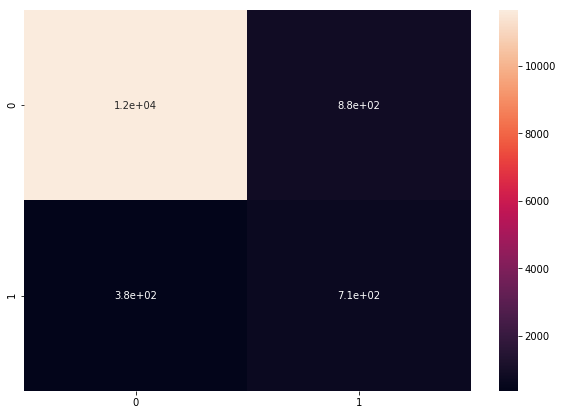

In [6]:
clf = lrcv('gluc_3', target_vars, df, resample=True)


chol_3

Before oversampling, counts of label '1': 6217
Before oversampling, counts of label '0': 48207 

After oversampling, counts of label '1': 48207
After oversampling, counts of label '0': 48207 

accuracy: 0.902175510804057
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     12025
         1.0       0.60      0.46      0.52      1581

   micro avg       0.90      0.90      0.90     13606
   macro avg       0.77      0.71      0.73     13606
weighted avg       0.89      0.90      0.90     13606

gluc_3    2.181738
height    0.592714
alco      0.364788
ap_lo     0.313421
age       0.232179
active    0.198851
smoke     0.140047
gender   -0.190982
weight   -0.436336
gluc_2   -0.667994
ap_hi    -0.855713
gluc_1   -1.066438
dtype: float64
Confusion matrix:



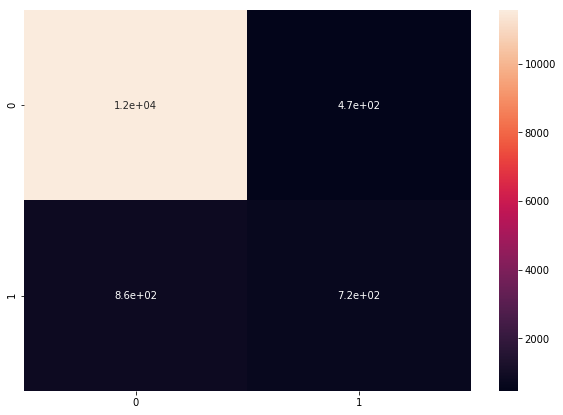

In [7]:
clf = lrcv('chol_3', target_vars, df, resample=True)

In [8]:
df = pd.read_csv('heart.csv')
df = df.dropna()
print(df.shape)

cont_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
ord_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
bin_cols = ['fbs', 'target', 'sex', 'exang']

df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(df[cont_cols])

# run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols

for col in ord_cols:
    dummies = pd.get_dummies(df[col])
    min_ind = min([ind for ind in dummies.columns])
    dummies.columns = ['{0}_{1}'.format(col, ind) for ind in dummies.columns]
    df_normalized = pd.concat([df_normalized, dummies.drop(['{0}_{1}'.format(col, min_ind)], axis=1)], axis=1)

df_normalized = pd.concat([df_normalized, df[bin_cols]], axis=1)

df_normalized.head()

,age,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,restecg_1,restecg_2,...,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,fbs,target,sex,exang
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,0,1,0,0,...,0,0,0,1,0,0,1,1,1,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0,1,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1



target

accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

cp_3         1.273806
cp_2         1.260022
slope_2      0.960034
thalach      0.820226
thal_2       0.753340
cp_1         0.631872
ca_4         0.499777
restecg_1    0.397269
fbs          0.301434
thal_1       0.210449
age          0.115186
chol        -0.188994
restecg_2   -0.200394
slope_1     -0.290340
thal_3      -0.602747
trestbps    -0.732082
exang       -0.905727
sex         -1.039295
ca_3        -1.169108
oldpeak     -1.224719
ca_1        -1.625406
ca_2        -1.909331
dtype: float64
Confusion matrix:



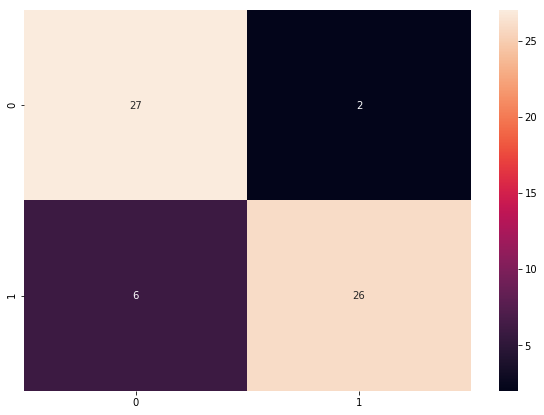

In [10]:
target_vars = {'target': ['target'], 'fbs':['fbs', 'target'], 'exang':['exang', 'target']}

clf = lrcv('target', target_vars, df_normalized, resample=False)


fbs

Before oversampling, counts of label '1': 31
Before oversampling, counts of label '0': 211 

After oversampling, counts of label '1': 211
After oversampling, counts of label '0': 211 

accuracy: 0.6229508196721312
              precision    recall  f1-score   support

           0       0.83      0.64      0.72        47
           1       0.32      0.57      0.41        14

   micro avg       0.62      0.62      0.62        61
   macro avg       0.58      0.60      0.57        61
weighted avg       0.72      0.62      0.65        61

trestbps     2.131212
cp_3         2.035908
cp_2         1.446817
ca_3         1.236801
age          1.148211
ca_2         1.063083
chol         0.703788
thal_1       0.542264
sex          0.169166
exang        0.145472
cp_1         0.062704
thal_3       0.013051
ca_1        -0.072369
thalach     -0.170527
restecg_1   -0.305632
ca_4        -0.682681
thal_2      -0.689856
restecg_2   -1.057988
slope_2     -1.128407
oldpeak     -1.478822
slope_1     -

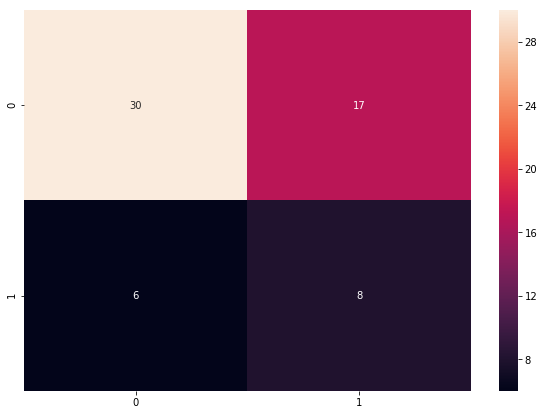

In [11]:
clf = lrcv('fbs', target_vars, df_normalized, resample=True)


exang

Before oversampling, counts of label '1': 76
Before oversampling, counts of label '0': 166 

After oversampling, counts of label '1': 166
After oversampling, counts of label '0': 166 

accuracy: 0.7704918032786885
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        38
           1       0.66      0.83      0.73        23

   micro avg       0.77      0.77      0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

oldpeak      0.742876
thal_3       0.720896
ca_1         0.696625
age          0.536149
chol         0.367527
trestbps     0.295801
sex          0.226537
restecg_1    0.162358
slope_1      0.052047
thal_1       0.041989
thal_2      -0.002221
fbs         -0.033969
restecg_2   -0.280503
ca_4        -0.406874
ca_2        -0.477305
ca_3        -0.570706
slope_2     -0.694501
cp_3        -1.460499
thalach     -1.628874
cp_2        -1.777084
cp_1       

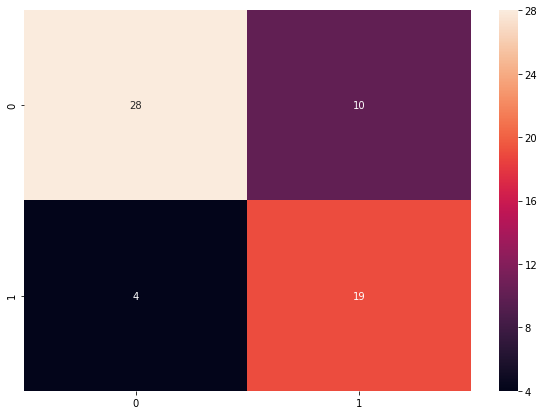

In [12]:
clf = lrcv('exang', target_vars, df_normalized, resample=True)

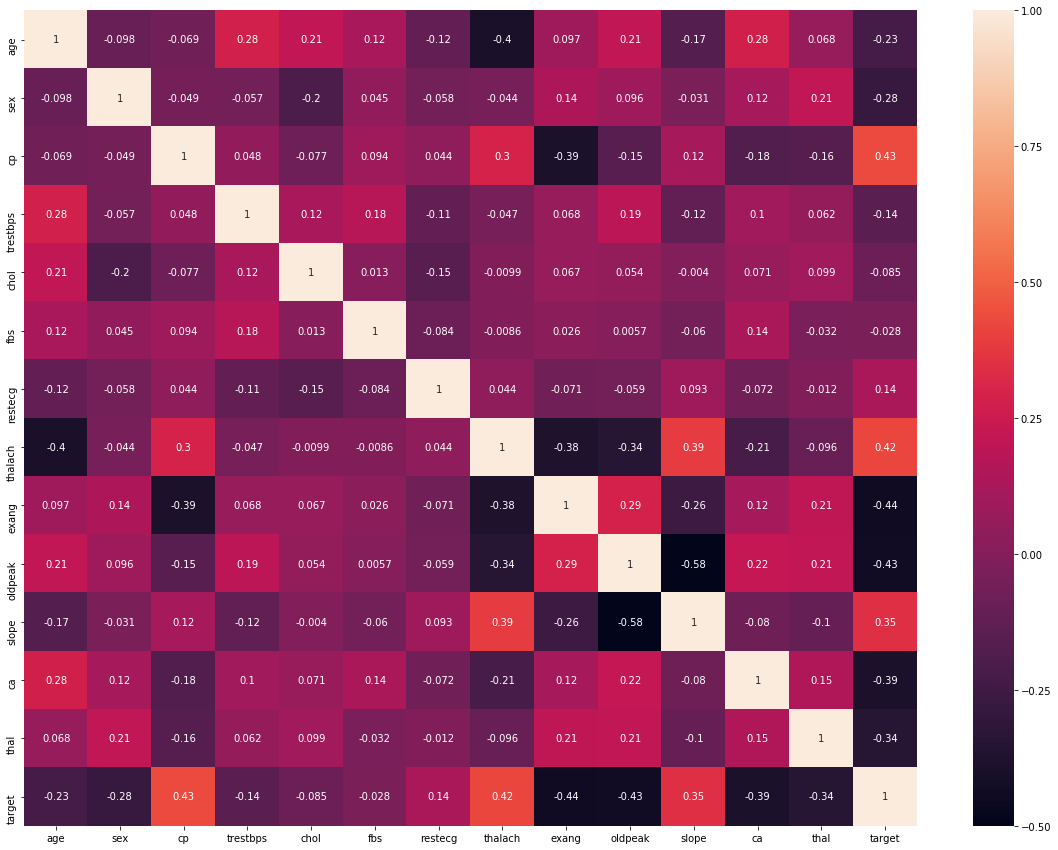

In [15]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), vmin = -0.5, vmax = 1, annot=True)

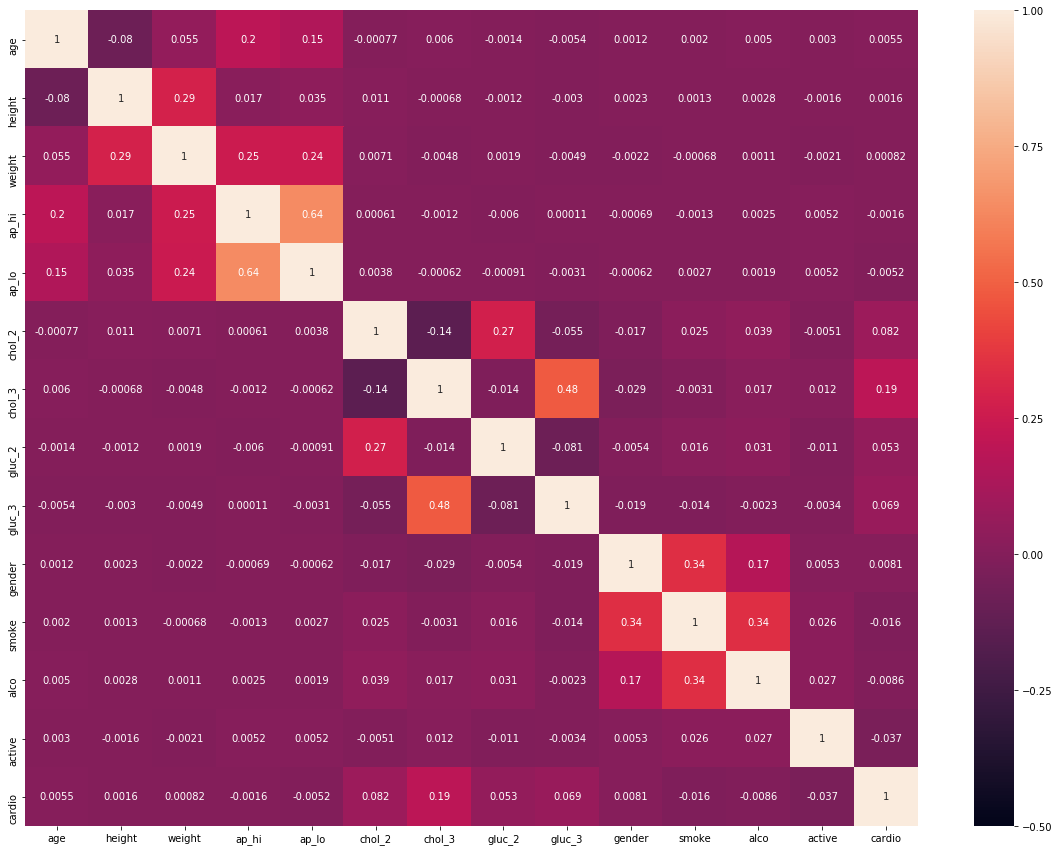

In [16]:
# check correlations
df = pd.read_csv('cardio_cleaned.csv')
df.rename(columns = {'cholesterol_1':'chol_1', 'cholesterol_2':'chol_2', 'cholesterol_3':'chol_3'}, inplace = True)
df = df.dropna()

plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), vmin = -0.5, vmax = 1, annot=True)